In [1]:
from csoundengine import *

In [2]:
s = Engine().session()



--Csound version 6.19 (double samples) Oct  1 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


In [3]:
s.defInstr('foo', r'''
; foo instr
; Args:
;   kfreq: frequency
if changed2(kfreq) == 1 then
    println "kfreq: %f", kfreq
endif
outch 1, oscili:a(0.1, kfreq) * linsegr:a(0, 0.01, 1, 0.01, 0)
''', args={'kfreq': 800})


Instr(foo, tabargs={'kfreq': 800})

In [4]:
sy = s.sched('foo', 0, 10, kfreq=1000)
sy

Button(description='Stop', style=ButtonStyle())

Output()

Synth(▶ foo:501.0002 start:2.647 dur:10.000 p4=9990)

In [10]:
sy.set(kfreq=400, delay=0.5)

kfreq: 400.000000


Forwarding to sched callback


UnifiedCSD:  /tmp/tmpkq8u70l0.csd
instr _releaseDynargsToken uses instrument number 7
instr _stop uses instrument number 8
instr _automateControlViaPargs uses instrument number 9
instr _automatePargViaPargs uses instrument number 10
instr _pwrite uses instrument number 11
instr _chnset uses instrument number 12
instr _setControl uses instrument number 13
instr _setDynamicControls uses instrument number 14
Elapsed time at end of orchestra compile: real: 0.016s, CPU: 0.016s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.017s, CPU: 0.017s
--Csound version 6.19 (double samples) Oct  1 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
graphics suppressed, ascii substituted
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
ftable 101:
ftable 101:	16000 points, scalemax 0.000
ftable 102:
ftable 102:	1000 points, scalemax 0.000
ftable 103:
ftable 103:	100 points, scalemax 0.000
ftable 104:
ftable 104:	10000 points, scalem


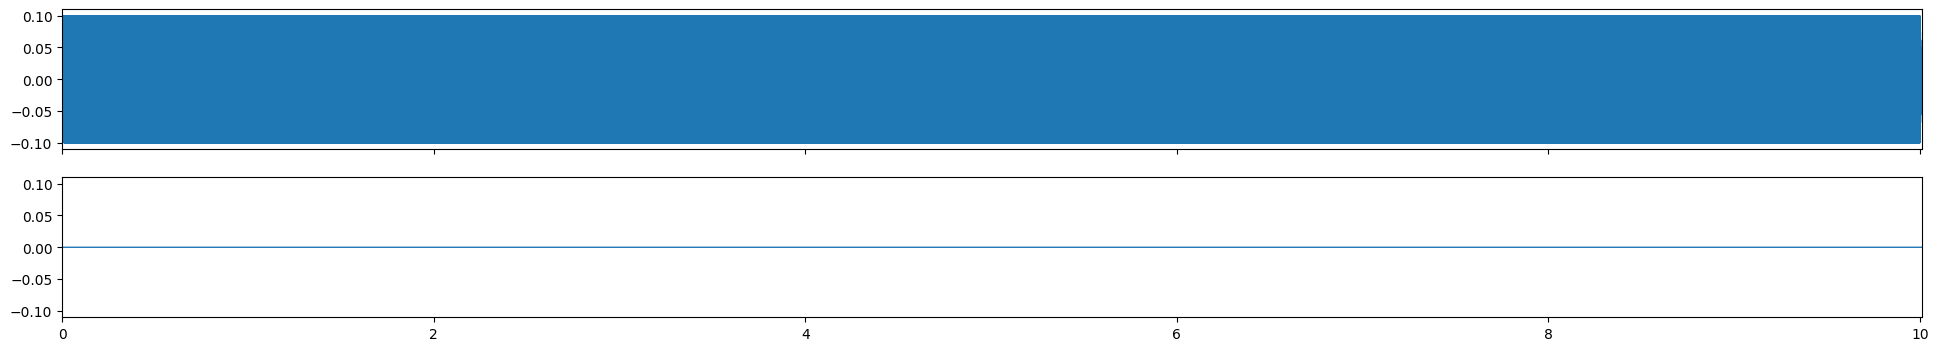

In [5]:
with s.rendering() as r:
    sy = s.sched('foo', 0, 10, kfreq=1000)
    sy.set(kfreq=400, delay=0.5)
    sy.set(kfreq=800, delay=1.5)
r

In [3]:
from csoundengine import *
r = Renderer()

In [4]:
r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
if changed(kfreq) == 1 then
    println "kfreq: %f", kfreq
endif
asig vco2 0.1, kfreq
outch 1, asig
''')

Instr(vco, ifreqbus:5)

UnifiedCSD:  /tmp/tmpb0fdgtgh.csd
instr _releaseDynargsToken uses instrument number 7
instr _stop uses instrument number 8
instr _automateControlViaPargs uses instrument number 9
instr _automatePargViaPargs uses instrument number 10
instr _pwrite uses instrument number 11
instr _chnset uses instrument number 12
instr _setControl uses instrument number 13
instr _setDynamicControls uses instrument number 14
Elapsed time at end of orchestra compile: real: 0.024s, CPU: 0.024s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.024s, CPU: 0.024s
--Csound version 6.19 (double samples) Oct  1 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
graphics suppressed, ascii substituted
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
ftable 101:
ftable 101:	16000 points, scalemax 0.000
ftable 102:
ftable 102:	1000 points, scalemax 0.000
ftable 103:
ftable 103:	100 points, scalemax 0.000
ftable 104:
ftable 104:	10000 points, scalem


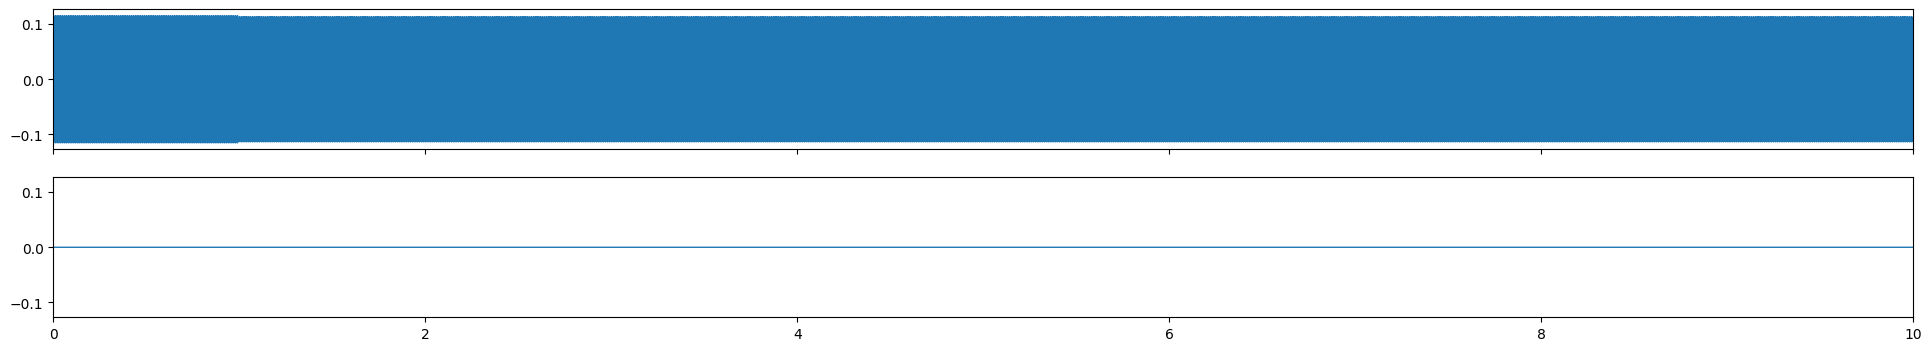

In [5]:
freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
freqbus.set(1000, delay=1)
r.render("~/tmp/vcotest.wav")
r

UnifiedCSD:  /tmp/tmpmfqb9v8c.csd
instr _releaseDynargsToken uses instrument number 7
instr _stop uses instrument number 8
instr _automateControlViaPargs uses instrument number 9
instr _automatePargViaPargs uses instrument number 10
instr _pwrite uses instrument number 11
instr _chnset uses instrument number 12
instr _setControl uses instrument number 13
instr _setDynamicControls uses instrument number 14
Elapsed time at end of orchestra compile: real: 0.016s, CPU: 0.016s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.021s, CPU: 0.021s
--Csound version 6.19 (double samples) Oct  1 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
graphics suppressed, ascii substituted
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
Strsets[20]: 'linear'
ftable 101:
ftable 101:	16000 points, scalemax 0.000
ftable 102:
ftable 102:	1000 points, scalemax 0.000
ftable 103:
ftable 103:	100 points, scalemax 0.000
ftable 104:
ftable 104


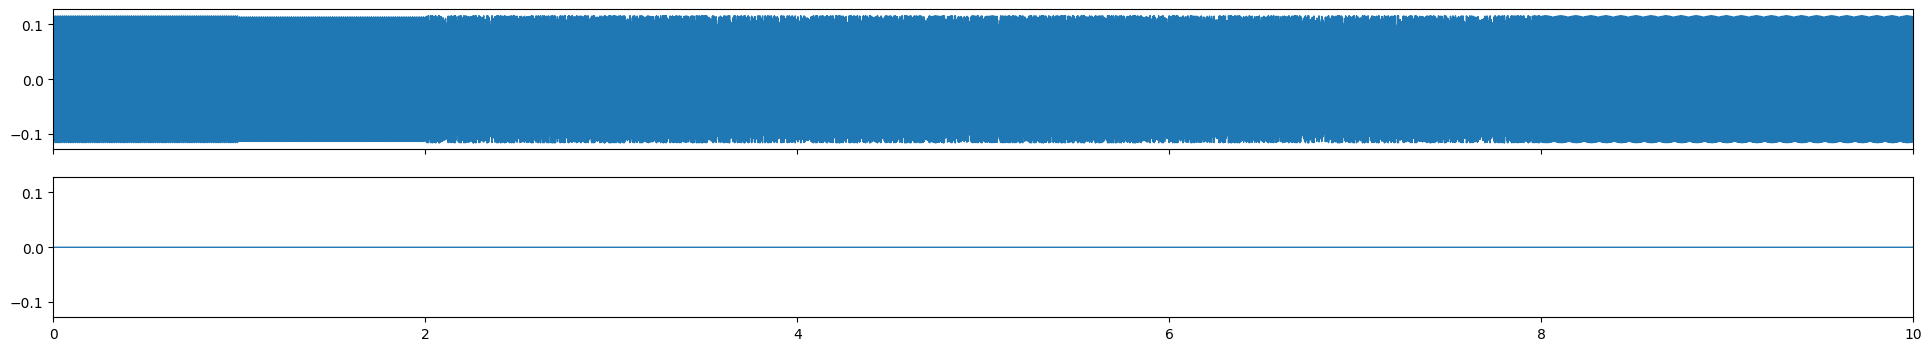

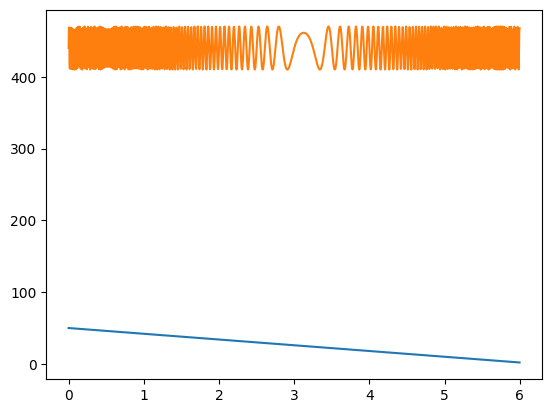

In [67]:
from csoundengine import *
from matplotlib import pyplot as plt
import numpy as np
import bpf4

r = Renderer()
r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')

freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
dur = 6
vibfreq = bpf4.linear(0, 50, dur, 2)
times = np.arange(0, dur, 0.004)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*2*np.pi*vibfreqs) * 30 + 440
freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=2)
r.render("~/tmp/vcotest.wav")
plt.plot(times, vibfreqs)
plt.plot(times, freqs)
r



In [62]:
r = Engine().session()

r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')

freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
dur = 6
vibfreq = bpf4.linear(0, 2, dur*0.5, 40, dur, 2)
times = np.arange(0, dur, 0.004)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*2*np.pi*vibfreqs) * 30 + 440
freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=2)





--Csound version 6.19 (double samples) Oct  1 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


In [1]:
from csoundengine import *
import numpy as np
import bpf4

s = Engine().session()

s.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')




--Csound version 6.19 (double samples) Oct  1 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 4096-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Instr(vco, ifreqbus:5)

In [2]:
freqbus = s.assignBus(value=500)
dur = 6
s1 = s.sched('vco', 0, dur+1, ifreqbus=freqbus)
times = np.arange(0, dur, 0.004)
freq = bpf4.halfcos(0, 440, dur*0.5, 880, dur, 440)
freqs = freq.map(times)
freqbus.automate((times, freqs), delay=0)


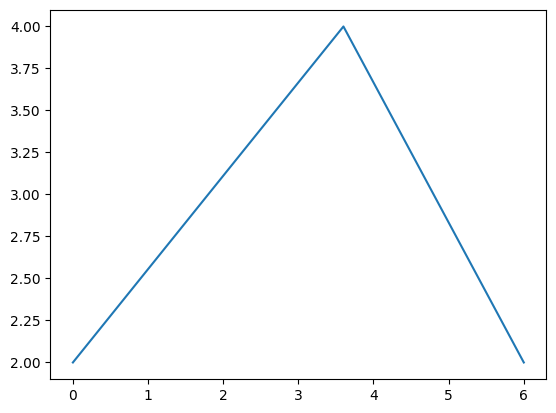

In [59]:
freqbus = s.assignBus(value=440)
dur = 6
s1 = s.sched('vco', 0, dur, ifreqbus=freqbus)

# vibfreq = bpf4.halfcos(0, 2, dur*0.5, 10, dur, 2)
vibfreq = bpf4.linear(0, 2, dur*0.6, 4, dur, 2)

vibfreq.plot()
times = np.arange(0, dur, 0.05)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*(2*3.141592)*vibfreqs) * 10 + 440
# freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=0)


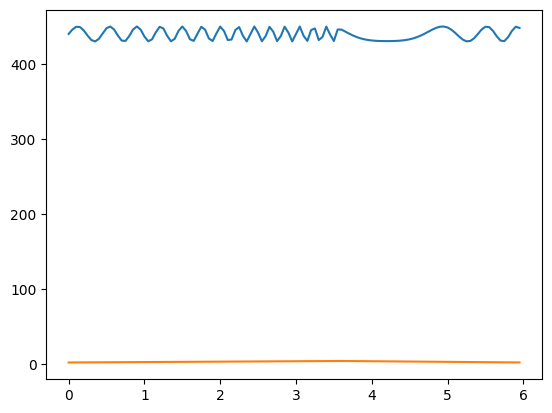

In [60]:
from matplotlib import pyplot as plt
plt.plot(times, freqs)
plt.plot(times, vibfreqs)

In [2]:
r.defInstr('sender', r'''
ibus = p5
ifreqbus = p6
kfreq = busin:k(ifreqbus)
if changed(kfreq) == 1 then
    println "kfreq: %f", kfreq
endif
asig vco2 0.1, kfreq
busout(ibus, asig)
''')

r.defInstr('receiver', r'''
ibus  = p5
kgain = p6
asig = busin:a(ibus)
asig *= a(kgain)
outch 1, asig
''')


Instr(receiver, ibus:5, kgain:6)

In [4]:
r.render()

UnifiedCSD:  /tmp/tmpibeaeliq.csd
instr _releaseDynargsToken uses instrument number 7
instr _stop uses instrument number 8
instr _automateControlViaPargs uses instrument number 9
instr _automatePargViaPargs uses instrument number 10
instr _pwrite uses instrument number 11
instr _chnset uses instrument number 12
instr _setControl uses instrument number 13
instr _setDynamicControls uses instrument number 14
Elapsed time at end of orchestra compile: real: 0.016s, CPU: 0.016s
sorting score ...
	... done
Elapsed time at end of score sort: real: 0.017s, CPU: 0.016s
--Csound version 6.19 (double samples) Oct  1 2023
[commit: 593ac80dd986b58f24e3d59242243ba6266edda7]
libsndfile-1.2.0
graphics suppressed, ascii substituted
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
ftable 101:
ftable 101:	16000 points, scalemax 0.000
ftable 102:
ftable 102:	1000 points, scalemax 0.000
ftable 103:
ftable 103:	100 points, scalemax 0.000
ftable 104:
ftable 104:	10000 points, scalem

('/tmp/tmp7pl2126x.wav',
 <Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/tmp/tmp7pl2126...>)


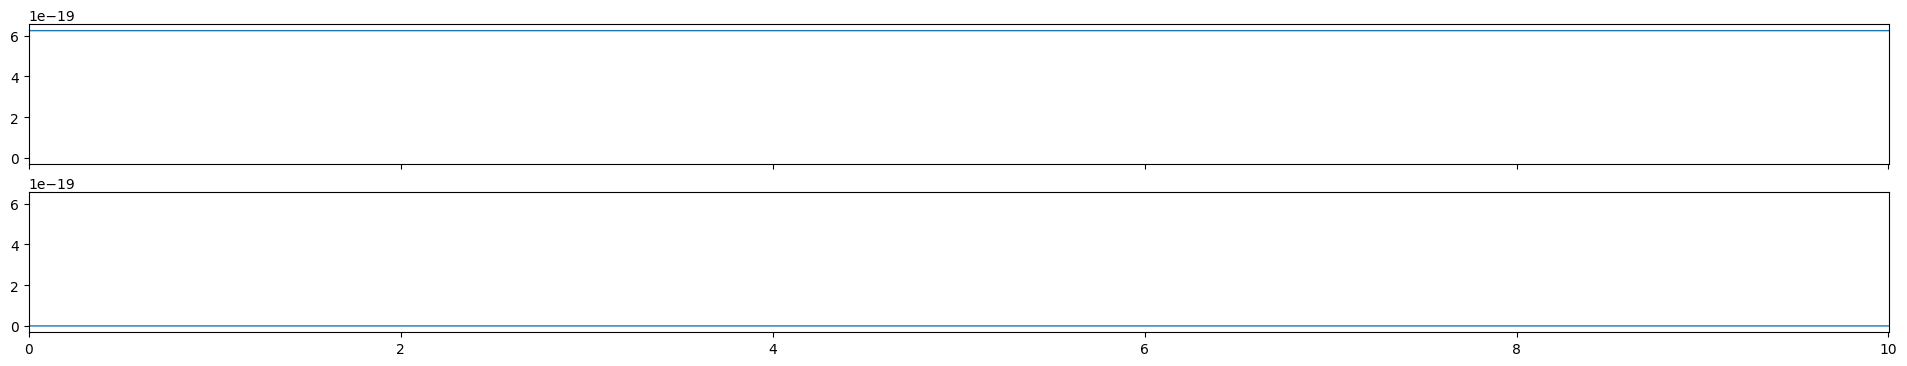

In [5]:
r

In [ ]:
r = Renderer()
r.